### Module 7 - Lab CountVectorizer

#### import CountVectorizer from sklearn...  nltk, and matplotlib

In [1]:
#import the CountVectorizer class from scikit-learn's
from sklearn.feature_extraction.text import CountVectorizer

#import ntlk matplotlib
import nltk
import matplotlib as plt

#### create an instance of the CountVectorizer class. use a variable called vectorizer

In [2]:
vectorizer = CountVectorizer()

#### use the following sample text 

In [3]:
corpus = ['NLP is about text processing', 'Text processing is necessary.', 
          'Text processing is necessary and important.', 'Text processing is easy.']

#### Call the fit() function in order to learn a vocabulary from the corpus.

In [4]:
vectorizer.fit(corpus)

CountVectorizer()

#### Let's inspect  how our vectorizer vectorized the text
#### print out a list of words used, and their index in the vectors

In [5]:
print(f'Vocabulary: \n {vectorizer.vocabulary_}')

Vocabulary: 
 {'nlp': 6, 'is': 4, 'about': 0, 'text': 8, 'processing': 7, 'necessary': 5, 'and': 1, 'important': 3, 'easy': 2}


#### create a vector by passing the text into the vectorizer to get back counts

In [6]:
vector = vectorizer.transform(corpus)

#### display the full vector. <br> use vector.toarray()

In [7]:
print(f'Full vector: \n {vector.toarray()}')

Full vector: 
 [[1 0 0 0 1 0 1 1 1]
 [0 0 0 0 1 1 0 1 1]
 [0 1 0 1 1 1 0 1 1]
 [0 0 1 0 1 0 0 1 1]]


#### print the One Hot vector for the word: "necessary"

In [8]:
print('Hot vector: ')
print(vectorizer.transform(['necessary']).toarray())

Hot vector: 
[[0 0 0 0 0 1 0 0 0]]


#### get the feature names

In [9]:
vectorizer.get_feature_names_out()

array(['about', 'and', 'easy', 'important', 'is', 'necessary', 'nlp',
       'processing', 'text'], dtype=object)

#### print the Frequency Distribution of the same text (corpus) using nltk.FreqDist()

In [10]:
corpus = """NLP is about text processing, Text processing is necessary., 
          Text processing is necessary and important., Text processing is easy."""

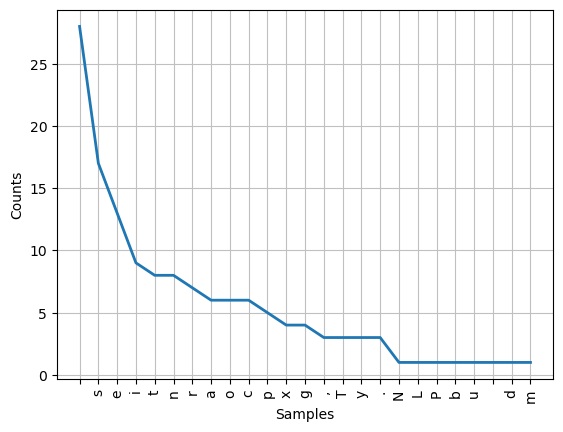

In [11]:
#Import FreqDist from nltk.probability
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

fdist = FreqDist(corpus)

fdist.plot()
plt.show()

### Part 2 - Let's use the Naive Bayes classifier

#### import pandas, os, numpy, train_test_split, CountVectorizer, accuracy_score, and MultinomialNB

In [12]:
import pandas as pd
import os
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

### import the three text files provided: yelp_labelled.txt, amazon_cells_labelled.txt, and imdb_labelled.txt

In [13]:
import pandas as pd

filepath_dict = {'yelp':   'yelp_labelled.txt',
                 'amazon': 'amazon_cells_labelled.txt',
                 'imdb':   'imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name: yelp, imdb, or amazon
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])

sentence    Wow... Loved this place.
label                       positive
source                          yelp
Name: 0, dtype: object


#### display the first five records

In [14]:
df.head()

,sentence,label,source
0,Wow... Loved this place.,positive,yelp
1,Crust is not good.,negative,yelp
2,Not tasty and the texture was just nasty.,negative,yelp
3,Stopped by during the late May bank holiday of...,positive,yelp
4,The selection on the menu was great and so wer...,positive,yelp


#### display the last 10 "negative" reviews (sentences)

In [15]:
df[df['label'] == 'negative'].tail(10)

,sentence,label,source
720,"If you act in such a film, you should be glad ...",negative,imdb
721,This one wants to surf on the small wave of sp...,negative,imdb
722,If you haven't choked in your own vomit by the...,negative,imdb
725,"Instead, we got a bore fest about a whiny, spo...",negative,imdb
742,I never walked out of a movie faster.,negative,imdb
743,I just got bored watching Jessice Lange take h...,negative,imdb
744,"Unfortunately, any virtue in this film's produ...",negative,imdb
745,"In a word, it is embarrassing.",negative,imdb
746,Exceptionally bad!,negative,imdb
747,All in all its an insult to one's intelligence...,negative,imdb


In [16]:
# sample

### Split the Test and Train Data into these variables: make the test size = 25% and random state = 42
### train_set, test_set, train_label, test_label

In [17]:
train_set, test_set, train_label, test_label = train_test_split(df, df['label'], test_size = 0.25, random_state = 42)

#### print the number of records in the train and test sets

In [18]:
print('\nThe Train Set consists of {} records and {} columns '.format(train_set.shape[0], train_set.shape[1]))
print('\nThe Test Set consists of {} records and {} columns '.format(test_set.shape[0], test_set.shape[1]))


The Train Set consists of 2061 records and 3 columns 

The Test Set consists of 687 records and 3 columns 


### Vectorize text data. Use the variables: countvect, x_counts, x_train_df, x_test_df

In [19]:
countvect = CountVectorizer()
x_counts = countvect.fit(train_set.sentence)

# preparing for training set
x_train_df = countvect.transform(train_set.sentence)

# preparing for test set
x_test_df = countvect.transform(test_set.sentence)

#### print the shape of x_train_df

In [20]:
x_train_df.shape

(2061, 4336)

#### Training the model

### use the Naive Bayes classifier. Use a variable called "clf" and fit the data (x_train_df,train_set.label)

In [21]:
clf = MultinomialNB()
clf.fit(x_train_df, train_set.label)

MultinomialNB()

### Test the model and print the accuracy of the Naive Bayes Classifier

In [22]:
pred_val_NB = clf.predict(x_test_df)
accuracy = round((accuracy_score(test_set.label, pred_val_NB) * 100), 2)
print('The accuracy of Naive Bayes classifier is {}%'.format(accuracy))

The accuracy of Naive Bayes classifier is 80.79%


#### Do you believe this is a low accuracy value?

In this dataset I believe that 80.79% could be considered low.  It is a solid starting point, but it should be evaluated against other factors to give a clearer picture of its accuracy.

#### create a function classify_review with a parameter called text. assing countvect.transform([text]) to a variable called pred1, and return clf.predict(pred1)[0]

In [23]:
def classify_review(text):
    # your code goes here
    pred1 = countvect.transform([text])
    # end of your code
    return clf.predict(pred1)[0]

#### Test the model calling the function classify_review using the following sentences: <br> "The food was amazing !!" and "The food was awful !!"

In [24]:
classify_review("The food was amazing !!")

'positive'

In [25]:
classify_review("The food was awful !!")

'negative'

## Part 3 - Let's use Keras

### import all the libraries needed: keras, Sequential, Tokenizer, KerasClassifier, LogisticRegression, OneHotEncoder, pad_sequences, tensorflow, layers, LabelEncoder, os, etc. 

In [26]:
#!pip install keras
#!pip install tensorflow
#!pip install Keras-Preprocessing
#!pip install scikeras

import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import os


from tensorflow.keras.models import Sequential
from keras import preprocessing
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from scikeras.wrappers import KerasClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

#### display the first five records of "df"

In [27]:
df.head()

,sentence,label,source
0,Wow... Loved this place.,positive,yelp
1,Crust is not good.,negative,yelp
2,Not tasty and the texture was just nasty.,negative,yelp
3,Stopped by during the late May bank holiday of...,positive,yelp
4,The selection on the menu was great and so wer...,positive,yelp


#### rename the columns: for the "label" change negative for 0 and possitive for 1 and rename the colunns v1: negative, v2: sentence <br> use inplace=True

In [28]:
df = df.rename(columns = {'v1':'negative', 'v2':'sentence'})
df['label'].replace(['negative', 'positive'], [0, 1], inplace=True)

#### display the top five records again

In [29]:
df.head()

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp


#### import train_test_split from sklearn.model_selection

In [30]:
from sklearn.model_selection import train_test_split

#### split the data using the variables: X_train, X_test, y_train, y_test <br> test size = 0.2 and random_state=42 <br> hint: train_test_split(df['sentence'], df['label']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df['sentence'], df['label'], test_size=0.2, random_state=42)

### create an instance of the CountVectorizer class, Call the fit(X_train) function in order to learn a vocabulary from one or more documents, and apply vectorizer.transform to X_train and X_test

In [32]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
# Enter two more lines of code here:

X_train_cv = vectorizer.transform(X_train)
X_test_cv = vectorizer.transform(X_test)

### create a variable called "logreg" and create an instance of the LogisticRegression. Then fit the data on (X_train_cv, y_train)

In [33]:
logreg = LogisticRegression()
logreg.fit(X_train_cv, y_train)

LogisticRegression()

### create a variable called y_pred and predict the value of X_test_cv usign logreg.predict <br> then print the accuracy of the logistic regression classifier

In [34]:
y_pred = logreg.predict(X_test_cv)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_cv, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


### What model gave you a hiher accuracy, logistic regression or the Naive Bayes classifier? 

The logistic regression classifier on the test set is 83%.  So the logistic regression model had the higher accuracy than the Naive Bayes classifier that had an accuracy of 80.79%

#### Tokenizing and Padding

In [35]:
tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(X_train)

X_train_emb = tokenizer.texts_to_sequences(X_train)
X_test_emb = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(X_train[0])
print(X_train_emb[0])

0                             Wow... Loved this place.
0    A very, very, very slow-moving, aimless movie ...
Name: sentence, dtype: object
[124, 314, 289, 2, 755, 916, 8, 101, 290, 15, 6]


#### All the messages should have the same lenght. 

### Use pad_sequences to make the maxlen of all the messages = 100 and apply this to the X_train and X_test values. <br> Then print (X_train[0, :])

In [36]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100
### your code goes here:

X_train = pad_sequences(X_train_emb, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test_emb, padding='post', maxlen=maxlen)

print(X_train[0, :])

[124 314 289   2 755 916   8 101 290  15   6   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


### Build the Neural Network model

The layers are stacked sequentially to build the classifier:

create the model = keras.Sequential()

The first layer is an Embedding layer. make it embedding_dim = 50.  This layer takes the integer-encoded vocabulary and looks up the embedding vector for each word-index. These vectors are learned as the model trains. The vectors add a dimension to the output array. The resulting dimensions are: (batch, sequence, embedding).

Next, a GlobalAveragePooling1D layer returns a fixed-length output vector for each example by averaging over the sequence dimension. This allows the model to handle input of variable length, in the simplest way possible.
This fixed-length output vector is piped through a fully-connected (Dense) layer with 16 neurons and activation function relu


The last layer is densely connected with a single output node. Using the sigmoid activation function, this value is a float between 0 and 1, representing a probability, or confidence level. 

compile the model using: optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']

In [37]:
embedding_dim = 50
# add Sequential
model = keras.Sequential()
# add the Embedding layer
model.add(keras.layers.Embedding(vocab_size, embedding_dim))
# add  GlobalMaxPool1D 
model.add(keras.layers.GlobalMaxPool1D())
# add hidden layer with 16 neurons and activation function relu
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
# add output layer with one neuron and activation sigmoid
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### print the summary of the model

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### fit the model using: X_train, y_train, epochs=30, verbose = 1, validation_data=(X_test, y_test), batch_size=32

In [39]:
model.fit(X_train, y_train, epochs=30, verbose=1, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5373 - loss: 0.6924 - val_accuracy: 0.6109 - val_loss: 0.6843
Epoch 2/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7928 - loss: 0.6636 - val_accuracy: 0.7873 - val_loss: 0.6083
Epoch 3/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8868 - loss: 0.5323 - val_accuracy: 0.8055 - val_loss: 0.4808
Epoch 4/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9155 - loss: 0.3631 - val_accuracy: 0.8109 - val_loss: 0.4077
Epoch 5/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9341 - loss: 0.2532 - val_accuracy: 0.8218 - val_loss: 0.3796
Epoch 6/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9506 - loss: 0.1706 - val_accuracy: 0.8164 - val_loss: 0.3702
Epoch 7/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9649 - loss: 0.1231 - val_accuracy: 0.8382 - val_loss: 0.3658
Epoch 8/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9840 - loss: 0.0831 - val_accuracy: 0.8327 - val_loss

#### evaluate the model and print the training and testing accuracy

In [40]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9991
Testing Accuracy:  0.8309
